In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [9]:
import random 
from itertools import chain, combinations

def choices( alphabet, k=3 ):
    # coming in Python 3.6 
    return [ random.choice( alphabet ) for _ in range(k) ] 

In [10]:
# first, we can design some barcodes 

def ham( u, v ):
    count = 0 
    for i, j in zip( u, v ):
        if i == j:
            count += 1
    return count / len( u ) 

def reverse_complement( sequence ):
    result = map( lambda x: dict(zip('ATCG','TAGC'))[x], sequence )
    return ''.join( result )[::-1]

def check( bc, against=[] ):
    # check the barcode 
    # 1. homopolymers 
    for bs in 'ATCG':
        if bs + bs in bc:
            return False 
    # 2. GC content
    gc_content = len(bc.replace('A','').replace('T','')) / len(bc)
    if gc_content > 0.70 or gc_content < 0.40:
        return False 
    # 2. hamming distance 
    for item in against:
        if bc == item:
            return False 
        if ham( item, bc ) > 0.6:
            return False 
        if ham( reverse_complement( item ), bc ) > 0.6:
            return False 
    # 3. is reverse complement of itself or a primer in pool?
    if bc == reverse_complement( bc ):
        return False
    for item in against:
        if bc == reverse_complement( item ):
            return False 
    return True 

n_iter = 100000
bc_len = 12 
pool = []
for n in range( n_iter ):
    bc = ''.join( choices( 'ATCG', bc_len ) )
    if check( bc, against=pool ):    
        pool.append( bc ) 

print( 'Ran {0} iterations and found {1} barcodes ({2:.2%})'.format( n_iter, len(pool), len(pool)/n_iter ) )
print( pool )

Ran 100000 iterations and found 245 barcodes (0.24%)
['ACAGTCACATAG', 'TGCTCACGATCT', 'GACGTCACATGT', 'TGTGATGCTGCT', 'TCTGCATGAGTC', 'ACACGAGCTGCA', 'GCATCACGCATG', 'CACTGCTCGTAC', 'CGAGCGTCTCTC', 'TATCGTGCGTCA', 'GCGACTGATGAC', 'AGCTGTCATCTA', 'CACAGCACTAGA', 'GCGAGCATCGCT', 'ATCAGACAGATC', 'GCGTAGCTACAG', 'AGACACGCTAGA', 'GACTAGCTCAGC', 'GCACATCTATGC', 'CGCGAGTACTGA', 'CACTGTCGAGTC', 'CATACACTGACT', 'AGCATGAGTGAC', 'AGTGCAGCTATC', 'TCAGCTCAGATG', 'ATAGTGTCGTCA', 'TCGCTGATGTAC', 'GCTACATATCTG', 'TGAGTCTGAGTA', 'AGTCTACTAGTG', 'GCGACTACGACT', 'CTACTGCTCGCT', 'GAGACGCTGTGC', 'TCTCTAGAGTAG', 'TCGCATGTCGTC', 'CAGTGCGATGAG', 'CGATATGCTCAG', 'GCTATACGCGTC', 'TGTGCAGTCGCA', 'GTAGTGTATGTG', 'CTCAGAGCTGTC', 'GTCTCGATATCA', 'GACATAGTGATG', 'AGTACTCAGTGT', 'ATGACTAGCGAG', 'TATGCGAGCACA', 'GCGTCTCTCGAT', 'CACATGTCTACG', 'AGTGCACGCTGC', 'CTGAGCTCTCTA', 'TATCACAGATGC', 'CACGTGATCGAG', 'CTGTAGTACGAG', 'AGACGTCTACTC', 'TCAGACGAGCGA', 'TACACGATCATC', 'TACGATGCAGTG', 'CTAGAGCATCTA', 'GCATGACTGCGT', 'C

(array([ 1365.,     0.,     0.,     0.,     0.,     0.,     0.,  4259.,
            0.,     0.,     0.,     0.,     0.,     0.,  6736.,     0.,
            0.,     0.,     0.,     0.,     0.,  6902.,     0.,     0.,
            0.,     0.,     0.,     0.,  5346.,     0.,     0.,     0.,
            0.,     0.,     0.,  3089.,     0.,     0.,     0.,     0.,
            0.,     0.,  1570.,     0.,     0.,     0.,     0.,     0.,
            0.,   623.]),
 array([ 0.        ,  0.01166667,  0.02333333,  0.035     ,  0.04666667,
         0.05833333,  0.07      ,  0.08166667,  0.09333333,  0.105     ,
         0.11666667,  0.12833333,  0.14      ,  0.15166667,  0.16333333,
         0.175     ,  0.18666667,  0.19833333,  0.21      ,  0.22166667,
         0.23333333,  0.245     ,  0.25666667,  0.26833333,  0.28      ,
         0.29166667,  0.30333333,  0.315     ,  0.32666667,  0.33833333,
         0.35      ,  0.36166667,  0.37333333,  0.385     ,  0.39666667,
         0.40833333,  0.42     

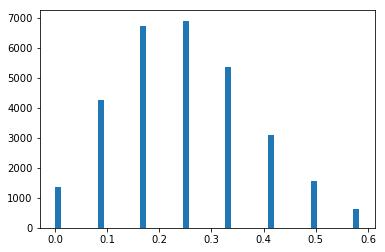

In [11]:
hams = list( map( lambda x: ham( *x ), combinations( pool, 2 ) ) )
plt.hist( hams, bins=50 ) 

In [12]:
# make_IDT_oligos

def design_IDT_oligos( sanger_primer_sequence, label ):
    to_order = []
    for n, bc in enumerate( pool ): 
        oligo = 'GC' + bc + sanger_primer_sequence 
        to_order.append(( oligo, '{}_bc{}'.format( label, n  ))) 
    return to_order

my_set = [
    ( 'TAATACGACTCACTATAGGG', 'T7_fwd' ), 
    ( 'GCTAGTTATTGCTCAGCGG', 'T7_rev' ), 
] 

total_to_order = []
for pair in my_set:
    result = design_IDT_oligos( *pair )
    total_to_order += result
    
order = list( chain( total_to_order ) ) 
order[ 0:10 ] # for viewing purposes 

[('GCACAGTCACATAGTAATACGACTCACTATAGGG', 'T7_fwd_bc0'),
 ('GCTGCTCACGATCTTAATACGACTCACTATAGGG', 'T7_fwd_bc1'),
 ('GCGACGTCACATGTTAATACGACTCACTATAGGG', 'T7_fwd_bc2'),
 ('GCTGTGATGCTGCTTAATACGACTCACTATAGGG', 'T7_fwd_bc3'),
 ('GCTCTGCATGAGTCTAATACGACTCACTATAGGG', 'T7_fwd_bc4'),
 ('GCACACGAGCTGCATAATACGACTCACTATAGGG', 'T7_fwd_bc5'),
 ('GCGCATCACGCATGTAATACGACTCACTATAGGG', 'T7_fwd_bc6'),
 ('GCCACTGCTCGTACTAATACGACTCACTATAGGG', 'T7_fwd_bc7'),
 ('GCCGAGCGTCTCTCTAATACGACTCACTATAGGG', 'T7_fwd_bc8'),
 ('GCTATCGTGCGTCATAATACGACTCACTATAGGG', 'T7_fwd_bc9')]

In [13]:
# data frame 

import pandas
df = pandas.DataFrame( order, columns=['sequence', 'label'] )
df.to_csv( 'barcoded_t7.csv' ) 

In [14]:
# format for IDT

for sequence, name in total_to_order:
    print( '{},{}'.format( name, sequence ) )

T7_fwd_bc0,GCACAGTCACATAGTAATACGACTCACTATAGGG
T7_fwd_bc1,GCTGCTCACGATCTTAATACGACTCACTATAGGG
T7_fwd_bc2,GCGACGTCACATGTTAATACGACTCACTATAGGG
T7_fwd_bc3,GCTGTGATGCTGCTTAATACGACTCACTATAGGG
T7_fwd_bc4,GCTCTGCATGAGTCTAATACGACTCACTATAGGG
T7_fwd_bc5,GCACACGAGCTGCATAATACGACTCACTATAGGG
T7_fwd_bc6,GCGCATCACGCATGTAATACGACTCACTATAGGG
T7_fwd_bc7,GCCACTGCTCGTACTAATACGACTCACTATAGGG
T7_fwd_bc8,GCCGAGCGTCTCTCTAATACGACTCACTATAGGG
T7_fwd_bc9,GCTATCGTGCGTCATAATACGACTCACTATAGGG
T7_fwd_bc10,GCGCGACTGATGACTAATACGACTCACTATAGGG
T7_fwd_bc11,GCAGCTGTCATCTATAATACGACTCACTATAGGG
T7_fwd_bc12,GCCACAGCACTAGATAATACGACTCACTATAGGG
T7_fwd_bc13,GCGCGAGCATCGCTTAATACGACTCACTATAGGG
T7_fwd_bc14,GCATCAGACAGATCTAATACGACTCACTATAGGG
T7_fwd_bc15,GCGCGTAGCTACAGTAATACGACTCACTATAGGG
T7_fwd_bc16,GCAGACACGCTAGATAATACGACTCACTATAGGG
T7_fwd_bc17,GCGACTAGCTCAGCTAATACGACTCACTATAGGG
T7_fwd_bc18,GCGCACATCTATGCTAATACGACTCACTATAGGG
T7_fwd_bc19,GCCGCGAGTACTGATAATACGACTCACTATAGGG
T7_fwd_bc20,GCCACTGTCGAGTCTAATACGACTCACTATAGGG
T7_fwd_bc21,GCCATACACTG